In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
y_train[0]

5

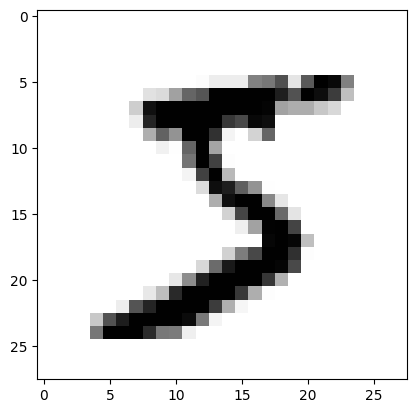

In [5]:
plt.imshow(X_train[0], cmap="binary")

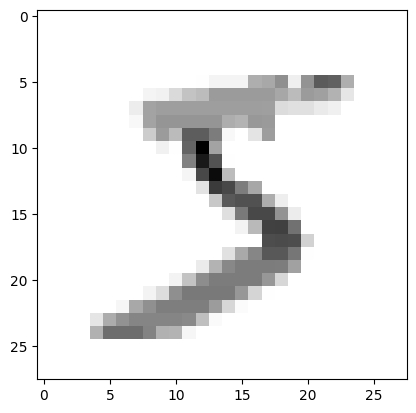

In [6]:
X_train = tf.keras.utils.normalize(X_train)
X_test = tf.keras.utils.normalize(X_test)
plt.imshow(X_train[0], cmap="binary")

In [7]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
print(y_train[0])

5


In [9]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(X_train.shape,X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Activation

In [11]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), input_shape=(28, 28, 1)))      # 28-3+1 = 26*26
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                             # 26/2 = 13

model.add(Conv2D(64, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation=tf.nn.relu))
# model.add(Dropout(0.4))
model.add(Dense(10,activation=tf.nn.softmax))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [13]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs = 10, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 21s 5ms/step - loss: 0.3016 - accuracy: 0.9038 - val_loss: 0.1034 - val_accuracy: 0.9689
Epoch 2/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0973 - accuracy: 0.9699 - val_loss: 0.0899 - val_accuracy: 0.9724
Epoch 3/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0681 - accuracy: 0.9794 - val_loss: 0.0620 - val_accuracy: 0.9789
Epoch 4/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0535 - accuracy: 0.9831 - val_loss: 0.0577 - val_accuracy: 0.9818
Epoch 5/10
1313/1313 [==============================] - 10s 7ms/step - loss: 0.0444 - accuracy: 0.9860 - val_loss: 0.0622 - val_accuracy: 0.9808
Epoch 6/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0358 - accuracy: 0.9887 - val_loss: 0.0566 - val_accuracy: 0.9822
Epoch 7/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0302 - accuracy: 0.9901 - val_loss: 0.0633 - val_accurac

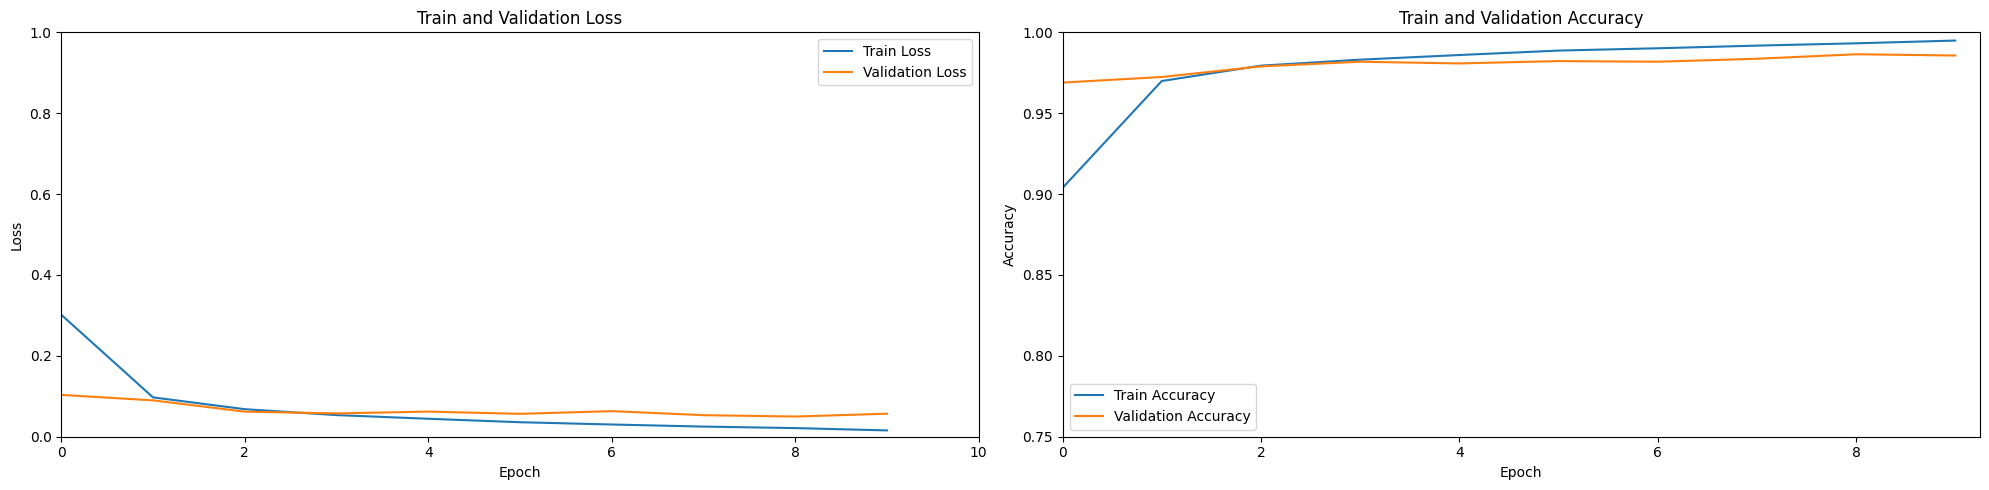

In [15]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()



plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0595 - accuracy: 0.9852
0.05949971452355385
0.9851999878883362


In [18]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [19]:
print(predictions)

[[1.5426252e-09 1.7206621e-07 4.8321979e-08 ... 9.9999952e-01
  8.9522129e-13 2.1334488e-07]
 [3.3718496e-08 1.6014216e-08 1.0000000e+00 ... 3.7995999e-08
  9.8056219e-10 1.5095778e-13]
 [2.5680903e-08 9.9997509e-01 2.7908635e-09 ... 1.0845245e-05
  4.3254133e-08 7.3285179e-08]
 ...
 [7.3884252e-18 7.4836040e-11 6.4454115e-16 ... 1.1594061e-10
  8.4131641e-10 3.5294345e-10]
 [6.0641585e-09 4.5867064e-12 1.7481638e-13 ... 4.0889295e-11
  5.5428495e-06 4.6432532e-08]
 [4.7207460e-09 3.0864816e-10 1.5279710e-11 ... 1.8097327e-12
  1.0653689e-09 3.4492233e-12]]


In [21]:
print(np.argmax(predictions[0]))

7


In [22]:
print(y_test[0])

7


In [35]:
y_preds = np.array([np.argmax(i) for i in predictions]) 
print(y_preds[0])

7


In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_preds)
cm


array([[ 971,    2,    0,    1,    0,    1,    3,    2,    0,    0],
       [   0, 1131,    0,    0,    0,    0,    2,    2,    0,    0],
       [   4,    0, 1007,    5,    2,    0,    3,   10,    1,    0],
       [   0,    0,    1,  998,    0,   11,    0,    0,    0,    0],
       [   0,    0,    0,    0,  978,    0,    2,    1,    0,    1],
       [   1,    0,    0,    5,    0,  884,    1,    1,    0,    0],
       [   3,    2,    0,    0,    7,    4,  941,    0,    1,    0],
       [   1,    7,    6,    0,    0,    0,    0, 1012,    2,    0],
       [   1,    1,    1,    4,    1,    5,    3,    3,  952,    3],
       [   3,    3,    0,    0,    9,   10,    0,    3,    3,  978]])

<Axes: >

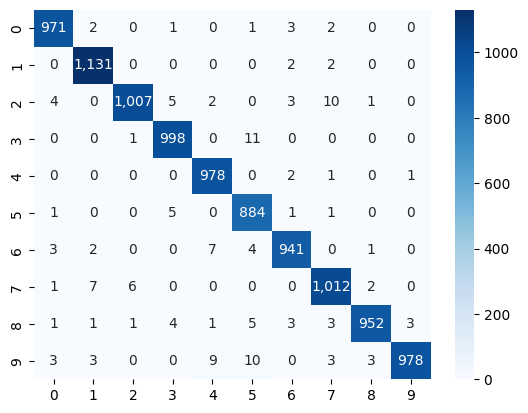

In [40]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt=',d')

In [41]:
model.save("digit_classifier.h5")

In [42]:
# Test model

In [80]:
import cv2

img = cv2.imread("/content/img1.png")

In [81]:
grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
resized = cv2.resize(grey, (28,28), interpolation = cv2.INTER_AREA)

In [82]:
resized.shape

(28, 28)

In [83]:
normalize_img = tf.keras.utils.normalize(resized)
final_img = np.array(normalize_img).reshape(-1, 28, 28, 1)

In [84]:
final_img.shape

(1, 28, 28, 1)

In [85]:
prediction = model.predict(final_img)

1/1 [==============================] - 0s 19ms/step


In [88]:
print(np.argmax(prediction))

0


In [89]:
prediction

array([[8.8377553e-01, 8.1345923e-03, 2.4735486e-02, 5.4932563e-05,
        1.0502268e-02, 5.5780914e-05, 3.6203727e-02, 3.4192849e-02,
        7.7414239e-04, 1.5707023e-03]], dtype=float32)

In [90]:
prediction.shape

(1, 10)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')